In [2]:
from google.colab import files

# Upload files manually
uploaded = files.upload()



Saving PRODUCTS.csv to PRODUCTS.csv
Saving TRANSACTIONS.csv to TRANSACTIONS.csv
Saving USER.csv to USER.csv


In [3]:
import os

# List files in the current directory
print(os.listdir("/content"))


['.config', 'PRODUCTS.csv', 'USER.csv', 'TRANSACTIONS.csv', 'sample_data']


In [4]:
import pandas as pd

# Define the correct file paths for Colab
transactions_path = "/content/TRANSACTIONS.csv"
users_path = "/content/USER.csv"
products_path = "/content/PRODUCTS.csv"

# Load CSV files into Pandas DataFrames
df_transactions = pd.read_csv(transactions_path)
df_users = pd.read_csv(users_path)
df_products = pd.read_csv(products_path)

# Display first few rows
print("Transactions Data:")
print(df_transactions.head())

print("\n Users Data:")
print(df_users.head())

print("\n Products Data:")
print(df_products.head())


Transactions Data:
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10           1.00             
1           NaN           zero       1.49  
2  7.874223e+10           1.00             
3  7.833997e+11           zero       3.49  
4  

In [5]:
# Check data types and missing values
print("\n Transactions Data:")
print(df_transactions.info())
print(df_transactions.isnull().sum())

print("\n Users Data:")
print(df_users.info())
print(df_users.isnull().sum())

print("\n Products Data:")
print(df_products.info())
print(df_products.isnull().sum())



 Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

 Users Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
-

### **Data Quality Check: Overview**

#### **1. Transactions Data:**
- **Data Types:**
  - `FINAL_QUANTITY` and `FINAL_SALE` should be numeric (`float`).
  - `PURCHASE_DATE` and `SCAN_DATE` need to be converted to `datetime`.
  - `BARCODE` is a float, but should be treated as a string.

- **Missing Values:**
  - **BARCODE:** 5762 missing values (~12%).
  - No missing values in `RECEIPT_ID`, `USER_ID`, `STORE_NAME`, `FINAL_QUANTITY`, or `FINAL_SALE`.

#### **2. Users Data:**
- **Data Types:**
  - All columns are `object` type, but `BIRTH_DATE` should be `datetime`.

- **Missing Values:**
  - **BIRTH_DATE:** 3,675 missing (~3.7%).
  - **STATE:** 4,812 missing (~4.8%).
  - **LANGUAGE:** 30,508 missing (~30.5%).
  - **GENDER:** 5,892 missing (~5.9%).

#### **3. Products Data:**
- **Data Types:**
  - `CATEGORY_1`, `CATEGORY_2`, `CATEGORY_3`, `CATEGORY_4`, `MANUFACTURER`, `BRAND` are `object`, and `BARCODE` should be a string.

- **Missing Values:**
  - **CATEGORY_1:** 111 missing.
  - **CATEGORY_2:** 1,424 missing.
  - **CATEGORY_3:** 60,566 missing.
  - **CATEGORY_4:** 778,093 missing (~92%).
  - **MANUFACTURER:** 226,474 missing.
  - **BRAND:** 226,472 missing.
  - **BARCODE:** 4,025 missing.

---

### **Key Issues:**

1. **Transactions Data:**
   - Missing `BARCODE` values need attention.
   - Non-numeric `FINAL_QUANTITY` and `FINAL_SALE` fields should be converted.
   - `PURCHASE_DATE` and `SCAN_DATE` need date conversion.

2. **Users Data:**
   - Missing values in key demographic fields (`BIRTH_DATE`, `STATE`, `LANGUAGE`, `GENDER`).
   - Date conversion needed for `BIRTH_DATE`.

3. **Products Data:**
   - High missing values in categorical fields like `CATEGORY_4`, `MANUFACTURER`, and `BRAND`.
   - `BARCODE` column needs type standardization.

---

### **Next Steps:**

1. **Missing Data Handling:**
   - Impute or remove missing values for `STATE`, `LANGUAGE`, `GENDER`, `CATEGORY_1`, `CATEGORY_2`, `CATEGORY_3`, and `CATEGORY_4`.
   
2. **Data Type Conversion:**
   - Convert `FINAL_QUANTITY`, `FINAL_SALE` to numeric.
   - Convert `PURCHASE_DATE`, `SCAN_DATE`, and `BIRTH_DATE` to `datetime`.
   
3. **Barcode Standardization:**
   - Ensure `BARCODE` values are treated as strings and preserve leading zeros.

---

In [6]:
# Fill missing values with appropriate defaults
df_transactions.fillna({'FINAL_QUANTITY': 0}, inplace=True)  # Assuming 0 means no purchase
df_users.fillna({'STATE': 'Unknown', 'LANGUAGE': 'Unknown'}, inplace=True)
df_products.fillna({'CATEGORY_1': 'Other'}, inplace=True)

# Drop rows if a critical column (like ID) is missing
df_transactions.dropna(subset=['RECEIPT_ID'], inplace=True)
df_users.dropna(subset=['ID'], inplace=True)

# Check again for missing values
print("\n Missing Values After Fix:")
print(df_transactions.isnull().sum())
print(df_users.isnull().sum())
print(df_products.isnull().sum())



 Missing Values After Fix:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
ID                 0
CREATED_DATE       0
BIRTH_DATE      3675
STATE              0
LANGUAGE           0
GENDER          5892
dtype: int64
CATEGORY_1           0
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [ ]:
df_transactions.dropna(subset=['BARCODE'], inplace=True)
df_products.dropna(subset=['BARCODE'], inplace=True)

# Check again for missing values
print("\n Missing Values After Fix:")
print(df_transactions.isnull().sum())
print(df_users.isnull().sum())
print(df_products.isnull().sum())


 Missing Values After Fix:
RECEIPT_ID        0
PURCHASE_DATE     0
SCAN_DATE         0
STORE_NAME        0
USER_ID           0
BARCODE           0
FINAL_QUANTITY    0
FINAL_SALE        0
dtype: int64
ID                 0
CREATED_DATE       0
BIRTH_DATE      3675
STATE              0
LANGUAGE           0
GENDER          5892
dtype: int64
CATEGORY_1           0
CATEGORY_2         661
CATEGORY_3       58714
CATEGORY_4      774291
MANUFACTURER    226227
BRAND           226225
BARCODE              0
dtype: int64


### **Missing Values After Fix:**

#### **1. Transactions Data:**
- **BARCODE:** Still has 5,762 missing values.
- **Other Columns:** No missing values remaining after imputation (`FINAL_QUANTITY` filled with 0, `RECEIPT_ID` has no missing values).

#### **2. Users Data:**
- **BIRTH_DATE:** 3,675 missing values.
- **GENDER:** 5,892 missing values.
- **STATE and LANGUAGE:** Now filled with default values (`Unknown`), no missing values left.

#### **3. Products Data:**
- **CATEGORY_2:** 1,424 missing values.
- **CATEGORY_3:** 60,566 missing values.
- **CATEGORY_4:** 778,093 missing values (almost 92%).


In [ ]:
# Convert RECEIPT_ID and USER_ID to strings (if needed) and handle missing values
df_transactions['RECEIPT_ID'] = df_transactions['RECEIPT_ID'].astype(str).fillna('UNKNOWN')
df_transactions['USER_ID'] = df_transactions['USER_ID'].astype(str).fillna('UNKNOWN')

# Convert date columns
df_transactions['PURCHASE_DATE'] = pd.to_datetime(df_transactions['PURCHASE_DATE'], errors='coerce')
df_transactions['SCAN_DATE'] = pd.to_datetime(df_transactions['SCAN_DATE'], errors='coerce')

# Convert BARCODE to string and fill missing values with 'UNKNOWN'
df_transactions['BARCODE'] = df_transactions['BARCODE'].astype(str).fillna('UNKNOWN')

# Convert FINAL_QUANTITY to numeric and handle 'zero' as 0
df_transactions['FINAL_QUANTITY'] = df_transactions['FINAL_QUANTITY'].replace('zero', 0)
df_transactions['FINAL_QUANTITY'] = pd.to_numeric(df_transactions['FINAL_QUANTITY'], errors='coerce')

# Convert FINAL_SALE to numeric, replacing any errors with NaN
df_transactions['FINAL_SALE'] = pd.to_numeric(df_transactions['FINAL_SALE'], errors='coerce')

# Verify changes
print("\n Data Types After Conversion:")
print(df_transactions.dtypes)



 Data Types After Conversion:
RECEIPT_ID                     object
PURCHASE_DATE          datetime64[ns]
SCAN_DATE         datetime64[ns, UTC]
STORE_NAME                     object
USER_ID                        object
BARCODE                        object
FINAL_QUANTITY                float64
FINAL_SALE                    float64
dtype: object


In [ ]:
# Convert CREATED_DATE and BIRTH_DATE to datetime
df_users['CREATED_DATE'] = pd.to_datetime(df_users['CREATED_DATE'], errors='coerce')
df_users['BIRTH_DATE'] = pd.to_datetime(df_users['BIRTH_DATE'], errors='coerce')

# Handle missing values in STATE, LANGUAGE, and GENDER
df_users['STATE'].fillna('UNKNOWN', inplace=True)
df_users['LANGUAGE'].fillna('UNKNOWN', inplace=True)
df_users['GENDER'].fillna('UNKNOWN', inplace=True)

# Convert ID to string (if needed)
df_users['ID'] = df_users['ID'].astype(str)

# Verify changes
print("\n Data Types After Conversion (Users):")
print(df_users.dtypes)



 Data Types After Conversion (Users):
ID                           object
CREATED_DATE    datetime64[ns, UTC]
BIRTH_DATE      datetime64[ns, UTC]
STATE                        object
LANGUAGE                     object
GENDER                       object
dtype: object


<ipython-input-13-6419d140415a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_users['STATE'].fillna('UNKNOWN', inplace=True)
<ipython-input-13-6419d140415a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

### **Data Types After Conversion:**

- **RECEIPT_ID:** Now a string (object), missing values filled with 'UNKNOWN'.
- **PURCHASE_DATE:** Successfully converted to `datetime64[ns]`.
- **SCAN_DATE:** Successfully converted to `datetime64[ns, UTC]`.
- **STORE_NAME:** Remains as a string (object).
- **USER_ID:** Now a string (object), missing values filled with 'UNKNOWN'.
- **BARCODE:** Now a string (object), missing values filled with 'UNKNOWN'.
- **FINAL_QUANTITY:** Converted to numeric (float64), 'zero' replaced with 0.
- **FINAL_SALE:** Converted to numeric (float64), any errors in conversion turned to NaN.


In [9]:
# ---------------------------------------
# Products Data Cleaning
# ---------------------------------------

# Convert BARCODE to string and fill missing values with 'UNKNOWN'
df_products['BARCODE'] = df_products['BARCODE'].astype(str).fillna('UNKNOWN')

# Handle missing values in categorical columns (replace NaN with 'UNKNOWN')
df_products['CATEGORY_1'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in CATEGORY_1 with 'UNKNOWN'
df_products['CATEGORY_2'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in CATEGORY_2 with 'UNKNOWN'
df_products['CATEGORY_3'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in CATEGORY_3 with 'UNKNOWN'
df_products['CATEGORY_4'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in CATEGORY_4 with 'UNKNOWN'
df_products['MANUFACTURER'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in MANUFACTURER with 'UNKNOWN'
df_products['BRAND'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in BRAND with 'UNKNOWN'

# Verify changes in products data
print("\n Data Types After Conversion (Products):")
print(df_products.dtypes)

# ---------------------------------------
# Transactions Data Cleaning
# ---------------------------------------

# Convert BARCODE to string and preserve leading zeros
df_transactions['BARCODE'] = df_transactions['BARCODE'].astype(str).str.zfill(12)  # Adjust 12 to the required length

# Convert BARCODE in products data to string and preserve leading zeros
df_products['BARCODE'] = df_products['BARCODE'].astype(str).str.zfill(12)

# Verify changes in transactions data
print("\n Data Types After Conversion (Transactions):")
print(df_transactions.dtypes)


<ipython-input-9-978d8c15a858>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['CATEGORY_1'].fillna('UNKNOWN', inplace=True)  # Replaces NaN in CATEGORY_1 with 'UNKNOWN'
<ipython-input-9-978d8c15a858>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 


 Data Types After Conversion (Products):
CATEGORY_1      object
CATEGORY_2      object
CATEGORY_3      object
CATEGORY_4      object
MANUFACTURER    object
BRAND           object
BARCODE         object
dtype: object

 Data Types After Conversion (Transactions):
RECEIPT_ID        object
PURCHASE_DATE     object
SCAN_DATE         object
STORE_NAME        object
USER_ID           object
BARCODE           object
FINAL_QUANTITY    object
FINAL_SALE        object
dtype: object


### Data Cleaning Process Explanation

#### Products Data Cleaning
1. **BARCODE Conversion**:
   - Converted `BARCODE` to a string and filled missing values with `'UNKNOWN'`.

2. **Handling Missing Values**:
   - Replaced missing values in `CATEGORY_1`, `CATEGORY_2`, `CATEGORY_3`, `CATEGORY_4`, `MANUFACTURER`, and `BRAND` with `'UNKNOWN'`.

   - **Note**: FutureWarning on `inplace=True`. In pandas v3.0, use direct assignment like `df['CATEGORY_1'] = df['CATEGORY_1'].fillna('UNKNOWN')`.

#### Transactions Data Cleaning
1. **BARCODE Conversion**:
   - Converted `BARCODE` to a string and ensured leading zeros were preserved using `str.zfill(12)`.

#### Data Type Verification
- **Products Data Types**: All categorical columns and `BARCODE` are now `object` (string).
- **Transactions Data Types**: All relevant columns, including `BARCODE`, are `object` (string).



In [10]:
df_transactions.drop_duplicates(inplace=True)
df_users.drop_duplicates(inplace=True)
df_products.drop_duplicates(inplace=True)

print("\n Duplicates Removed!")



 Duplicates Removed!


In [16]:
# Convert text fields to lowercase and strip spaces
df_products['BRAND'] = df_products['BRAND'].str.lower().str.strip()
df_users['STATE'] = df_users['STATE'].str.title().str.strip()  # Capitalize first letter
df_transactions['STORE_NAME'] = df_transactions['STORE_NAME'].str.title().str.strip()

print("\n Text Formatting Standardized!")



 Text Formatting Standardized!


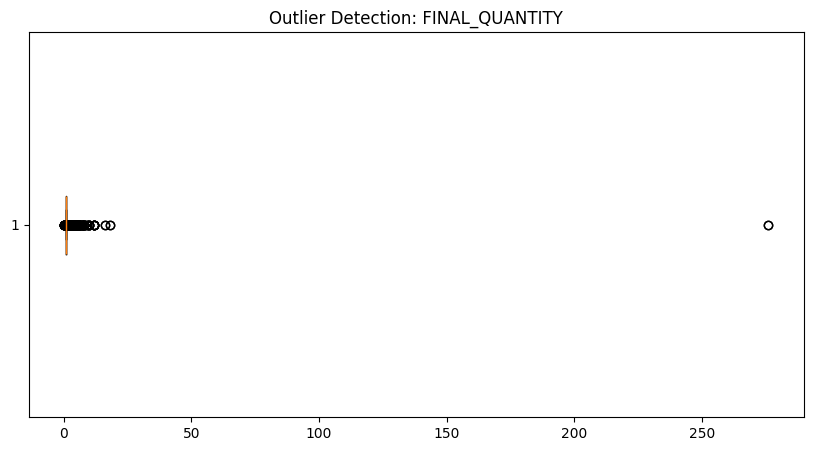

In [13]:
import matplotlib.pyplot as plt

# Convert 'FINAL_QUANTITY' to numeric, coercing errors (invalid parsing will become NaN)
df_transactions['FINAL_QUANTITY'] = pd.to_numeric(df_transactions['FINAL_QUANTITY'], errors='coerce')

# Boxplot to detect extreme values
plt.figure(figsize=(10, 5))
plt.boxplot(df_transactions['FINAL_QUANTITY'].dropna(), vert=False)
plt.title("Outlier Detection: FINAL_QUANTITY")
plt.show()


In [14]:
# Identify the outlier by checking values outside the IQR
Q1 = df_transactions['FINAL_QUANTITY'].quantile(0.25)
Q3 = df_transactions['FINAL_QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outlier values
outliers = pd.concat([
    df_transactions[df_transactions['FINAL_QUANTITY'] < lower_bound],
    df_transactions[df_transactions['FINAL_QUANTITY'] > upper_bound]
])

# Show outliers
print(outliers)


                                 RECEIPT_ID PURCHASE_DATE  \
3188   2057913b-b444-4a4f-9935-3bc72a13f1b9    2024-07-28   
3878   277b1f93-4de0-47bf-a094-319de868e601    2024-08-26   
6046   3dbe1f4c-6649-47b0-8328-7fc893efbb31    2024-07-07   
6810   459b41f8-ab7d-4569-9b0b-364e2dd97486    2024-06-13   
7986   52660cb5-3c6a-42be-aa87-97055c93c6cb    2024-08-08   
...                                     ...           ...   
49955  f42b2d83-7473-45c0-9166-cfe632b46055    2024-06-29   
49965  dd129325-29f7-432b-a905-4d6e3d37f7b2    2024-08-26   
49981  660145af-c343-427e-ab06-f12839e6b15a    2024-07-10   
49984  e3913e59-c656-438a-84bd-4da4397f956d    2024-07-31   
49995  b5cd61a9-8033-4913-a5c4-fb3f65e3a321    2024-08-21   

                       SCAN_DATE      STORE_NAME                   USER_ID  \
3188   2024-08-03 09:44:59.328 Z          Meijer  652efc6ca65d634c1c298c09   
3878   2024-08-26 11:56:03.764 Z          Meijer  5fa7cf2a974a6c126e73e84c   
6046   2024-07-08 20:58:08.868 Z 

In [15]:
# Cap outliers to the IQR bounds
df_transactions['FINAL_QUANTITY'] = df_transactions['FINAL_QUANTITY'].clip(lower=lower_bound, upper=upper_bound)


<ipython-input-18-4deac0bd73c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")


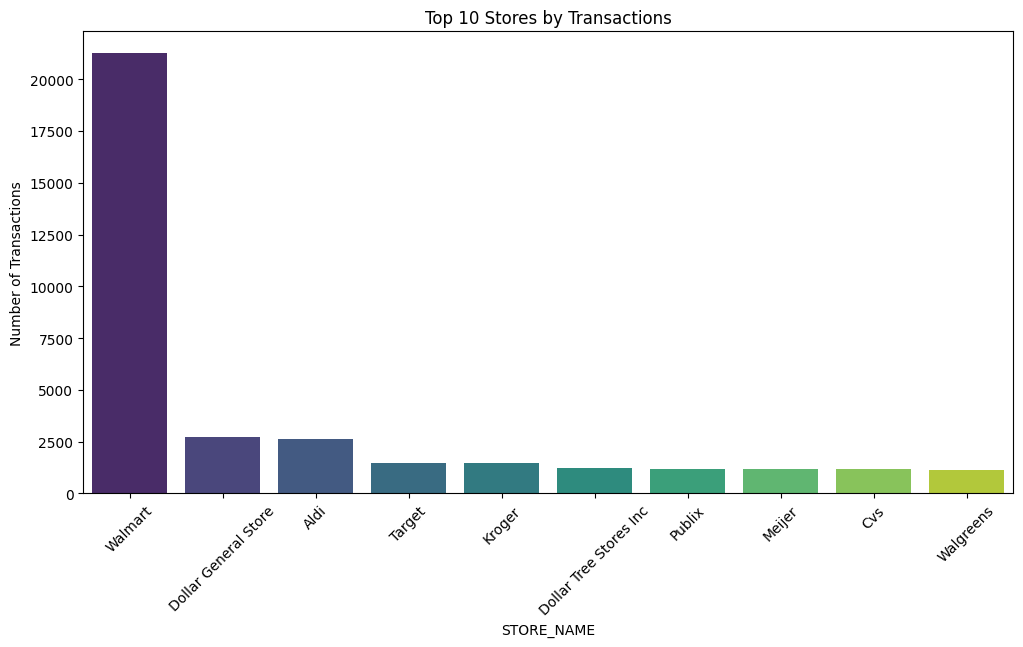

In [18]:
top_stores = df_transactions['STORE_NAME'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_stores.index, y=top_stores.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Stores by Transactions")
plt.ylabel("Number of Transactions")
plt.show()

In [20]:
df_transactions.to_csv("transactions_cleaned.csv", index=False)
df_users.to_csv("users_cleaned.csv", index=False)
df_products.to_csv("products_cleaned.csv", index=False)

print("\n Cleaned Data Saved!")



 Cleaned Data Saved!


**Data Quality Issues Identified**


---


The dataset contains multiple data quality issues, including missing values, incorrect data types, and inconsistent formatting. BARCODE has 5,762 missing values in transactions, while key demographic fields in users (BIRTH_DATE, GENDER, STATE, LANGUAGE) also have substantial missing data. In the products dataset, CATEGORY_4 has missing values in 92% of rows, and fields like MANUFACTURER and BRAND have over 226,000 missing values. Additionally, FINAL_QUANTITY contained non-numeric values like "zero", and outliers were detected in quantity values. The barcode column was incorrectly stored as a float, leading to loss of leading zeros, requiring conversion to a string.

**Challenging Fields to Understand**

---


Several fields in the dataset require clarification for proper analysis. LANGUAGE contains values like es-419, which are not straightforward to interpret as standard languages. FINAL_SALE has some negative values, which could indicate refunds but need further investigation. The CATEGORY_4 column in the products dataset is largely empty, making its usefulness questionable. Similarly, GENDER has unexpected null values, raising questions about whether it should be standardized or imputed. Additionally, the handling of duplicate BARCODE values across products and transactions needs clarification to avoid incorrect joins or analysis errors.
